# Lab 4

Wyatt Saltzman and Landon Wood  
Dr. Larson  
CS 7324  
October 29, 2023  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read in dataset and confirm df is populated
data = 'acs2017_census_tract_data.csv'
df = pd.read_csv(data)
print(df.shape)
df.head()

(74001, 37)


,TractId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001020100,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,1001020200,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,1001020300,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,1001020400,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,1001020500,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [2]:
# Check for duplicates
duplicates = df[df['TractId'].duplicated(keep=False)]
print("Number of duplicates in df:", duplicates.size)

# Drop TractId column, as it's uneccesary for classification
df = df.drop('TractId', axis=1)
df.head()

Number of duplicates in df: 0


,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,Alabama,Autauga County,1845,899,946,2.4,86.3,5.2,0.0,1.2,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,Alabama,Autauga County,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,Alabama,Autauga County,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,Alabama,Autauga County,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,Alabama,Autauga County,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3


In [3]:
# Look at missing values
print(df.isna().sum())
print('Number of rows with missing values:', df.isnull().any(axis=1).sum())

State                  0
County                 0
TotalPop               0
Men                    0
Women                  0
Hispanic             696
White                696
Black                696
Native               696
Asian                696
Pacific              696
VotingAgeCitizen       0
Income              1116
IncomeErr           1116
IncomePerCap         745
IncomePerCapErr      745
Poverty              842
ChildPoverty        1110
Professional         811
Service              811
Office               811
Construction         811
Production           811
Drive                801
Carpool              801
Transit              801
Walk                 801
OtherTransp          801
WorkAtHome           801
MeanCommute          946
Employed               0
PrivateWork          811
PublicWork           811
SelfEmployed         811
FamilyWork           811
Unemployment         810
dtype: int64
Number of rows with missing values: 1283


In [4]:
import copy

df_dropped = copy.deepcopy(df) # Create deep copy of df to avoid overwriting
df_dropped.dropna(axis='index',inplace=True)

# Reset index of df to keep order consistent
df_dropped.reset_index(drop=True, inplace=True)

print('df shape before dropping:', df.shape)
print('df shape after dropping:', df_dropped.shape)
print(df_dropped.isna().sum())
print('Number of rows with missing values:', df_dropped.isnull().any(axis=1).sum())

df shape before dropping: (74001, 36)
df shape after dropping: (72718, 36)
State               0
County              0
TotalPop            0
Men                 0
Women               0
Hispanic            0
White               0
Black               0
Native              0
Asian               0
Pacific             0
VotingAgeCitizen    0
Income              0
IncomeErr           0
IncomePerCap        0
IncomePerCapErr     0
Poverty             0
ChildPoverty        0
Professional        0
Service             0
Office              0
Construction        0
Production          0
Drive               0
Carpool             0
Transit             0
Walk                0
OtherTransp         0
WorkAtHome          0
MeanCommute         0
Employed            0
PrivateWork         0
PublicWork          0
SelfEmployed        0
FamilyWork          0
Unemployment        0
dtype: int64
Number of rows with missing values: 0


In [5]:
# Encode all string data as integers
# Note: label encoding should not be used for state and county in general; these should be one-hot encoded.
# However, the lab specifies to only encode as ints for now.
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_dropped['State'] = label_encoder.fit_transform(df_dropped['State'])
df_dropped['County'] = label_encoder.fit_transform(df_dropped['County'])

print('State values after label encoding:', df_dropped['State'].unique())
print('County values after label encoding:', df_dropped['County'].unique())

State values after label encoding: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 40 41 42 43 44 45 46 47 48
 49 50 51 39]
County values after label encoding: [  89   97  108 ... 1818 1929 1938]


At this point, we are actually going to drop the County column. This is for a couple of reasons. First, we do not feel that County will be as strong of a predictor for child poverty rates than the other numerical data in the dataset. Additionally, the County variable presents challenges when encoding the data. Later in the lab, when we one-hot encoded categorical data, we found that one-hot encoding the County column in the train and test data, not all counties were present in both of these inputs. This is a major problem because it results in the one-hot encoding take up a different amount of space, resulting in different numbers of columns in the train and test data. This makes our neural network's "feedforward()" function fail, as the two matrices inputted must have equal column dimensions for matrix multiplication to occur. Given these challenges, we feel justified removing the County column.

In [6]:
# Drop County column
df_dropped = df_dropped.drop('County', axis=1)
df_dropped

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,0,1845,899,946,2.4,86.3,5.2,0.0,1.2,0.0,...,0.5,0.0,2.1,24.5,881,74.2,21.2,4.5,0.0,4.6
1,0,2172,1167,1005,1.1,41.6,54.5,0.0,1.0,0.0,...,0.0,0.5,0.0,22.2,852,75.9,15.0,9.0,0.0,3.4
2,0,3385,1533,1852,8.0,61.4,26.5,0.6,0.7,0.4,...,1.0,0.8,1.5,23.1,1482,73.3,21.1,4.8,0.7,4.7
3,0,4267,2001,2266,9.6,80.3,7.1,0.5,0.2,0.0,...,1.5,2.9,2.1,25.9,1849,75.8,19.7,4.5,0.0,6.1
4,0,9965,5054,4911,0.9,77.5,16.4,0.0,3.1,0.0,...,0.8,0.3,0.7,21.0,4787,71.4,24.1,4.5,0.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72713,39,6011,3035,2976,99.7,0.3,0.0,0.0,0.0,0.0,...,0.5,0.0,3.6,26.9,1576,59.2,33.8,7.0,0.0,20.8
72714,39,2342,959,1383,99.1,0.9,0.0,0.0,0.0,0.0,...,0.0,0.0,1.3,25.3,666,58.4,35.4,6.2,0.0,26.3
72715,39,2218,1001,1217,99.5,0.2,0.0,0.0,0.2,0.0,...,3.4,0.0,3.4,23.5,560,57.5,34.5,8.0,0.0,23.0
72716,39,4380,1964,2416,100.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,24.1,1062,67.7,30.4,1.9,0.0,29.5


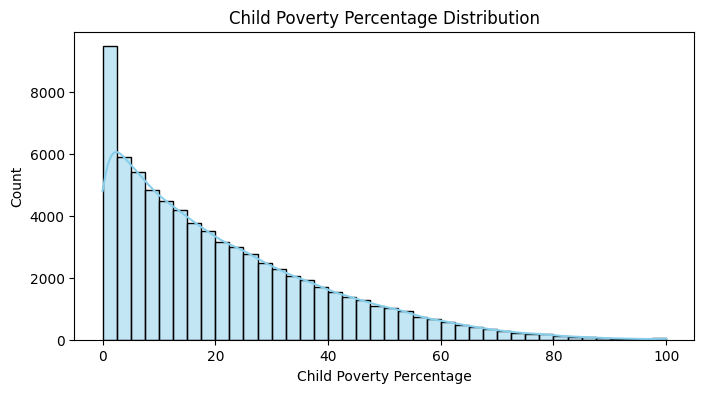

In [8]:
plt.figure(figsize=(8,4))
sns.histplot(df_dropped['ChildPoverty'], bins=40, kde=True, color='skyblue')
plt.xlabel('Child Poverty Percentage')
plt.ylabel('Count')
plt.title('Child Poverty Percentage Distribution')
plt.show()

Check out the poverty levels for which the government provides subsidies. To determine the bin_edges.

In [9]:
# TODO: Potentially we should change the bin edges to be more evenly distributed as you can see in the graph I made above.
# We could do 0-10, 10-20, 20-30, and 30+ 

# Define the bin edges and labels for the categories
bin_edges = [0, 10, 20, 30, 100]
bin_labels = [0, 1, 2, 3]

# TODO: determine better split for rates of child poverty

df_processed = df_dropped.copy()

# Use the cut function to create the categorical column
df_processed['ChildPoverty'] = pd.cut(df_processed['ChildPoverty'], bins=bin_edges, labels=bin_labels, include_lowest=True)

child_poverty_counts = df_processed['ChildPoverty'].value_counts()
num_records = 72718

print(child_poverty_counts)
print('Percentage of child poverty for each category:')
# print percentages of child poverty for each category rounded to 2 decimal places
print(np.round(child_poverty_counts / num_records, 2))


ChildPoverty
0    25822
3    19666
1    15866
2    11364
Name: count, dtype: int64
Percentage of child poverty for each category:
ChildPoverty
0    0.36
3    0.27
1    0.22
2    0.16
Name: count, dtype: float64


In [30]:
# split the dataset into training and testing sets
from sklearn.model_selection import train_test_split


X = df_processed.drop('ChildPoverty', axis=1).values
y = df_processed['ChildPoverty'].astype('uint8').values # TODO: "You will need to one hot encode the target, but do not one hot encode the categorical data until instructed to do so in the lab. "
# This target is not currently one hot encoded.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(58174, 34)
(58174,)
(14544, 34)
(14544,)


In [31]:
# use smotenc to balance the dataset
from imblearn.over_sampling import SMOTENC

cateogrical_features = [0]
sm = SMOTENC(categorical_features=cateogrical_features)

X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
print('Class balance after SMOTENC:', np.bincount(y_train_smote))
print(X_train_smote.shape)
print(y_train_smote.shape)

Class balance after SMOTENC: [20804 20804 20804 20804]
(83216, 34)
(83216,)


In [32]:
print(np.unique(X_train_smote[:, 0]))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.]


We chose to use SMOTE (Synthetic Minority Over-sampling Technique) to balance our data because our dataset exhibited a significant class imbalance, with a notably smaller number of instances in the minority classes. In such imbalanced datasets, standard machine learning models may struggle to accurately classify minority classes due to the limited number of examples available for training. SMOTE provides an effective solution by creating synthetic samples for the minority classes, effectively expanding the dataset and making it more balanced. This technique not only mitigates the risk of model bias towards the majority class but also enhances the model's ability to learn from all classes, ultimately leading to improved classification performance.

Balancing the dataset is typically done on the training set only, and not on the testing set. The reason for this is related to the objectives of model training and evaluation. Here's why:

1. **Training Set Balancing**:

   - Balancing the training set helps the machine learning model learn from all classes effectively, particularly when dealing with imbalanced data.
   - In an imbalanced dataset, the model can become biased toward the majority class. By balancing the training set, you ensure that the model is exposed to roughly equal amounts of data from each class, helping it learn the underlying patterns and relationships in all classes.

2. **Testing Set Unaltered**:

   - The testing set is intended to simulate how well your model will perform on real-world, unseen data.
   - Balancing the testing set would artificially alter the class distribution, which doesn't reflect the actual class distribution you would encounter in practice.
   - Balancing the testing set can lead to overly optimistic evaluation results because the model has been trained on a different class distribution.

3. **Realistic Evaluation**:

   - By keeping the testing set unaltered, you ensure that the model's performance evaluation reflects its ability to generalize to the actual, imbalanced distribution that you will encounter in real-world scenarios.
   - This realistic evaluation is crucial for understanding how well your model will perform in practice and making meaningful decisions about its deployment.

In summary, balancing is a preprocessing step that is applied to the training set to help the model learn effectively. The testing set should remain untouched to provide a realistic assessment of your model's performance under real-world class distribution conditions.

## Two-Layer Perceptron

Now, we will define our two layer perceptron. We will be using the sample code provided in the class notebook "8a. Practical_NeuralNets with Bias".

In [15]:
 # Base two layer perceptron with vectorized back propagation
import numpy as np
from scipy.special import expit
import pandas as pd
import sys

class TwoLayerPerceptronBase(object):
    def __init__(self, n_hidden=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden = n_hidden
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
        
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
            
        return onehot

    def _initialize_weights(self):
        """Initialize weights with small random numbers."""
        W1_num_elems = (self.n_features_)*self.n_hidden
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden, self.n_features_) # reshape to be W
        b1 = np.zeros((self.n_hidden, 1))
        
        W2_num_elems = (self.n_hidden)*self.n_output_
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_output_, self.n_hidden)
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        # 1.0 / (1.0 + np.exp(-z))
        return expit(z)
    
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2))
    
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A3)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _feedforward(self, X, W1, W2, b1, b2):
        """Compute feedforward step
        -----------
        X : Input layer with original features.
        W1: Weight matrix for input layer -> hidden layer.
        W2: Weight matrix for hidden layer -> output layer.
        ----------
        a1-a3 : activations into layer (or output layer)
        z1-z2 : layer inputs 

        """
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        return A1, Z1, A2, Z2, A3
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = -2*(Y_enc-A3)*A3*(1-A3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
    
    def predict(self, X):
        """Predict class labels"""
        _, _, _, _, A3 = self._feedforward(X, self.W1, self.W2, self.b1, self.b2)
        y_pred = np.argmax(A3, axis=0)
        return y_pred

In [16]:
# Add mini batching

from sklearn.metrics import accuracy_score
class TLPMiniBatch(TwoLayerPerceptronBase):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
        
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.b1, self.b2 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape) # for momentum
        rho_W2_prev = np.zeros(self.W2.shape) # for momentum

        self.cost_ = []
        self.score_ = []
        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
            
        for i in range(self.epochs):

            # adaptive learning rate
            # decrease at certain epochs
            eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

            if print_progress>0 and (i+1)%print_progress==0:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx_shuffle = np.random.permutation(y_data.shape[0])
                X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

            mini = np.array_split(range(y_data.shape[0]), self.minibatches)
            mini_cost = []
            for idx in mini:

                # feedforward
                A1, Z1, A2, Z2, A3 = self._feedforward(X_data[idx],
                                                       self.W1,
                                                       self.W2,
                                                       self.b1,
                                                       self.b2
                                                      )
                
                cost = self._cost(A3,Y_enc[:, idx],self.W1,self.W2)
                mini_cost.append(cost) # this appends cost of mini-batch only

                # compute gradient via backpropagation
                gradW1, gradW2, gradb1, gradb2 = self._get_gradient(A1=A1, A2=A2, A3=A3, Z1=Z1, Z2=Z2, 
                                                  Y_enc=Y_enc[:, idx],
                                                  W1=self.W1,W2=self.W2)

                
                # simple momentum calculations
                
                rho_W1, rho_W2 = eta * gradW1, eta * gradW2
                self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev)) # update with momentum
                self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev)) # update with momentum
                
                # no need for momentum in bias 
                # these values need to change abruptly and 
                # do not influence sensitivity backward
                self.b1 -= eta * gradb1
                self.b2 -= eta * gradb2
                
                # update previous parameters 
                rho_W1_prev, rho_W2_prev = rho_W1, rho_W2
                
                

            self.cost_.append(np.mean(mini_cost))
            self.score_.append(accuracy_score(y_data,self.predict(X_data)))
            
            # update if a validation set was provided
            if XY_test is not None:
                yhat = self.predict(X_test)
                self.val_score_.append(accuracy_score(y_test,yhat))
            
        return self
    

In [17]:
# Implement cross entropy loss
class TLPMiniBatchCrossEntropy(TLPMiniBatch):
    def _cost(self,A3,Y_enc,W1,W2):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A3+1e-7)+(1-Y_enc)*np.log(1-A3+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2)
        return cost + L2_term
    
    def _get_gradient(self, A1, A2, A3, Z1, Z2, Y_enc, W1, W2):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V2 = (A3-Y_enc) # <- this is only line that changed
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C

        return gradW1, gradW2, gradb1, gradb2
        
    

In [18]:
# Add Glorot initialization to finalize TLP
class TLP_Vec_Mini_Cross_Glorot(TLPMiniBatchCrossEntropy):             
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden)) 
        
        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden, 1))
        b2 = np.zeros((self.n_output_, 1))
        
        return W1, W2, b1, b2

This neural network contains the four requirements: vectorized gradient computation, mini batching, cross entropy loss, and  Glorot intialization. It also incorporates momentum in the "fit()" function. Now, let's try fitting and classifying the data:

In [33]:
# Helper function to print accuracies of nn classification
def print_accuracies(nn,X_train,y_train,X_test,y_test):
    
    yhat = nn.predict(X_train)
    print('Resubstitution accuracy:',accuracy_score(y_train,yhat))
    
    yhat = nn.predict(X_test)
    print('Validation accuracy:',accuracy_score(y_test,yhat))

In [20]:
# Parameter dictionary for neural network
vals = { 'n_hidden':50, 
         'C':0.1, 'epochs':100, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1, 'decrease_iter':15,
         'minibatches':50,
         'shuffle':True,'random_state':1}

# delete everything below this line
nn = TLP_Vec_Mini_Cross_Glorot(**vals)
%time nn.fit(X_train, y_train, print_progress=10, XY_test=(X_test, y_test))
print_accuracies(nn,X_train,y_train,X_test,y_test)

Epoch: 100/100

CPU times: user 1min 33s, sys: 11.5 s, total: 1min 45s
Wall time: 11.4 s
Resubstitution accuracy: 0.355554027572455
Validation accuracy: 0.3587733773377338


#### Smote

In [34]:
smote_nn = TLP_Vec_Mini_Cross_Glorot(**vals)
%time smote_nn.fit(X_train_smote, y_train_smote, print_progress=10, XY_test=(X_test, y_test))
print_accuracies(smote_nn,X_train_smote,y_train_smote,X_test,y_test)

Epoch: 100/100

CPU times: user 2min 6s, sys: 20.4 s, total: 2min 26s
Wall time: 15.8 s
Resubstitution accuracy: 0.25116564122284174
Validation accuracy: 0.1577970297029703


~65% accuracy is not great right now. However, by graphing our cost function vs. number of epochs, we can see that our training does converge:

##### SMOTE

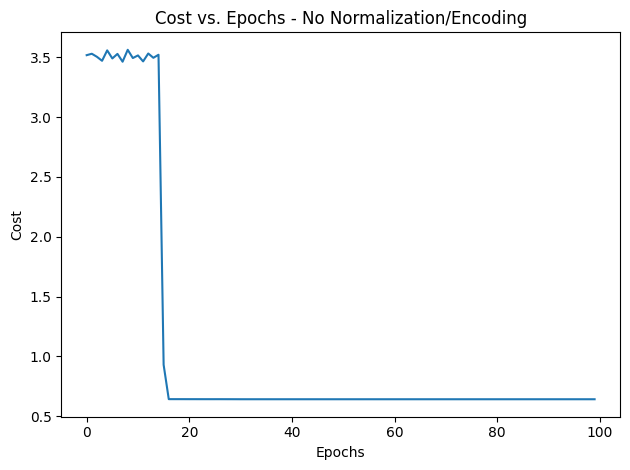

In [35]:
plt.plot(range(len(smote_nn.cost_)), smote_nn.cost_)
plt.title('Cost vs. Epochs - No Normalization/Encoding')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

Now, we will perform the same steps as above, but we will normalize the continuous numeric feature data first, and see if that makes any difference in our classification performance:

In [36]:
# Normalize continuous numeric feature data with the balanced training data
from sklearn.preprocessing import StandardScaler# Exclude column corresponding to State

exclude_indices = [0]
columns_to_exclude = X_train_smote[:, exclude_indices]

# Normalize all other columns, as they are all continuous feature data
columns_to_normalize = np.delete(X_train_smote, exclude_indices, axis=1)

# Use scikit-learn to normalize
scaler = StandardScaler()
normalized_columns = scaler.fit_transform(columns_to_normalize)

# Combine the two columns back into one array
X_train_smote_norm = np.hstack((columns_to_exclude, normalized_columns))

# Now do the same thing, but on X_test
columns_to_exclude = X_test[:, exclude_indices]
columns_to_normalize = np.delete(X_test, exclude_indices, axis=1)
scaler = StandardScaler()
normalized_columns = scaler.fit_transform(columns_to_normalize)
X_test_norm = np.hstack((columns_to_exclude, normalized_columns))


print(X_train_smote_norm.shape)
print(X_test_norm.shape)

(83216, 34)
(14544, 34)


In [37]:
print(np.unique(X_train_smote[:, 0]))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51.]


In [38]:
# Run TLP with normalized data and balanced training data

smote_nn_norm = TLP_Vec_Mini_Cross_Glorot(**vals)
%time smote_nn_norm.fit(X_train_smote_norm, y_train_smote, print_progress=10, XY_test=(X_test_norm, y_test))
print_accuracies(smote_nn_norm,X_train_smote_norm,y_train_smote,X_test_norm,y_test)

Epoch: 100/100

CPU times: user 2min 36s, sys: 29 s, total: 3min 5s
Wall time: 20.3 s
Resubstitution accuracy: 0.6273673332051528
Validation accuracy: 0.6423954895489549


Great, so normalizing the data made a big difference, giving us an ~18% increase in accuracy. Again, our training does converge:

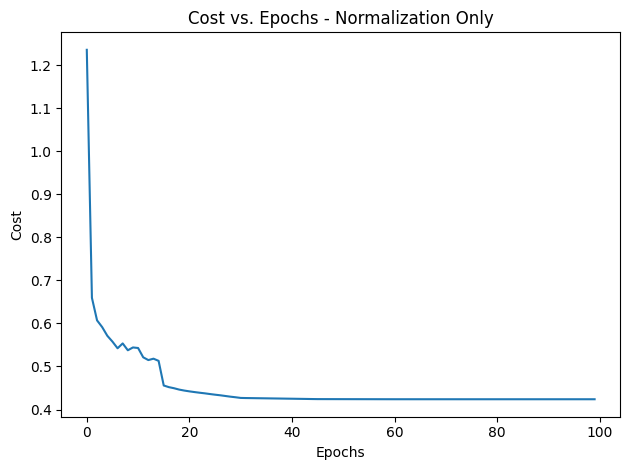

In [39]:
plt.plot(range(len(smote_nn_norm.cost_)), smote_nn_norm.cost_)
plt.title('Cost vs. Epochs - Normalization Only')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

Next, we will perform the same process again, but this time we will also encode the categorical columns. It should be noted that we are making an important assumption: that train and test will both contain all possible state values after the split. As we discussed when we were dropping the County variable, we need the one-hot encoding to take up the same number of columns for our neural network's "feedforward()" function to work. We are fine making this assumption, as given the sample size, it is very likely that train and test will both have all states.

In [40]:
# Perform the same process as normalization above, specifying the first two columns to encode, encoding, and combining
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter('ignore', FutureWarning)

indices = [0]
columns_to_encode = X_train_smote_norm[:, indices]
columns_to_exclude = np.delete(X_train_smote_norm, indices, axis=1)
encoder = OneHotEncoder(sparse=False)
one_hot_encoded_columns = encoder.fit_transform(columns_to_encode)
X_train_smote_norm_enc = np.hstack((one_hot_encoded_columns, columns_to_exclude))

# Repeat for X_test_norm
columns_to_encode = X_test_norm[:, indices]
columns_to_exclude = np.delete(X_test_norm, indices, axis=1)
encoder = OneHotEncoder(sparse=False)
one_hot_encoded_columns = encoder.fit_transform(columns_to_encode)
X_test_norm_enc = np.hstack((one_hot_encoded_columns, columns_to_exclude))

print(X_train_smote_norm_enc.shape)
print(X_test_norm_enc.shape)

(83216, 85)
(14544, 85)


In [41]:
smote_nn_norm_enc = TLP_Vec_Mini_Cross_Glorot(**vals)
%time smote_nn_norm_enc.fit(X_train_smote_norm_enc, y_train_smote, print_progress=10, XY_test=(X_test_norm_enc, y_test))
print_accuracies(smote_nn_norm_enc,X_train_smote_norm_enc,y_train_smote,X_test_norm_enc,y_test)

Epoch: 100/100

CPU times: user 3min 17s, sys: 51.2 s, total: 4min 8s
Wall time: 26.8 s
Resubstitution accuracy: 0.7341496827533167
Validation accuracy: 0.7083333333333334


Once again, we see an improvement in our classification accuracy when we also encode the categorical columns, and our training still converges:

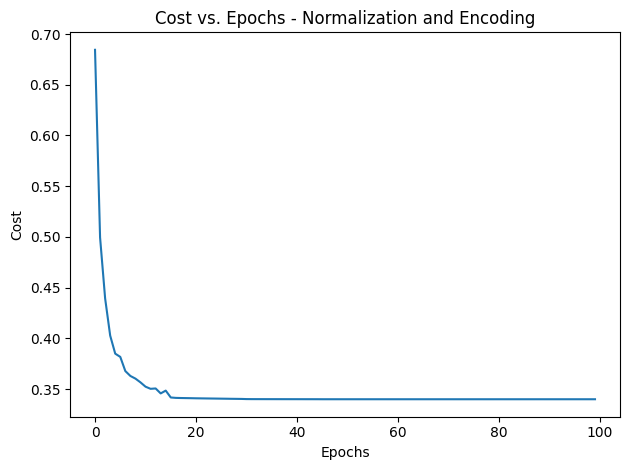

In [42]:
plt.plot(range(len(smote_nn_norm_enc.cost_)), smote_nn_norm_enc.cost_)
plt.title('Cost vs. Epochs - Normalization and Encoding')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

With each additional preprocessing step, our classification accuracy improved. Not normalizing or one-hot encoding any of the data performed significantly worse than when we did normalize or encode. The performance difference is very meaningful when we normalized; we saw an almost 18% increase in accuracy, for both resubstitution and validation. The improvement was smaller when we also included encoding. Although it was only a ~3% increase, this is a tangible and desirable increase  for such a simple preprocessing step to take. These differences emphasize the importance of proper preprocessing, especially the importance of normalization. From class, we know that neural networks want normalized values, and when we did not normalize, we really weren't doing that much better than chance. Thankfully, moving forward, we will continue to use the normalized and encoded data.

In [48]:
# three layer perceptron class
class ThreeLayerPerceptron(object):
    def __init__(self, n_hidden1=30, n_hidden2=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
        return onehot
    
    def _initialize_weights(self):
        '''Initialize weights with small random numbers'''
        # Layer 1
        W1_num_elems = (self.n_features_)*self.n_hidden1
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden1, self.n_features_)
        b1 = np.zeros((self.n_hidden1, 1))

        # Layer 2
        W2_num_elems = (self.n_hidden1)*self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden1)
        b2 = np.zeros((self.n_hidden2, 1))

        # Layer 3
        W3_num_elems = (self.n_hidden2)*self.n_output_
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_output_, self.n_hidden2)
        b3 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, b1, b2, b3
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        return expit(z)
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2))
    
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A4)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term

    def _feed_forward(self, X, W1, W2, W3, b1, b2, b3):
        '''Compute feedforward step'''
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        return A1, Z1, A2, Z2, A3, Z3, A4
    
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        '''Compute gradient step using backpropagation'''
        # vectorized backpropagation
        V3 = -2*(Y_enc-A4)*A4*(1-A4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3
    
    def predict(self, X):
        '''Predict class labels'''
        _, _, _, _, _, _, A4 = self._feed_forward(X, self.W1, self.W2, self.W3, self.b1, self.b2, self.b3)
        y_pred = np.argmax(A4, axis=0)
        return y_pred

In [53]:
# Three layer perceptron with mini-batch and cooling and cross entropy loss and Glorot initialization
class ThreeLayerEnhanced(ThreeLayerPerceptron):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)

    # Glorot initialization
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden2 + self.n_hidden1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1)) 

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden2))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden2)) 

        # set these to zero to start so that
        # they do not immediately saturate the neurons
        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, b1, b2, b3
    
    # Cross entropy loss
    def _cost(self,A4,Y_enc,W1,W2,W3):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A4+1e-7)+(1-Y_enc)*np.log(1-A4+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3)
        return cost + L2_term
    
    # Vectorized backpropagation
    def _get_gradient(self, A1, A2, A3, A4, Z1, Z2, Z3, Y_enc, W1, W2, W3):
        """ Compute gradient step using backpropagation.
        """
        # vectorized backpropagation
        V3 = (A4-Y_enc)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C

        return gradW1, gradW2, gradW3, gradb1, gradb2, gradb3

    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.b1, self.b2, self.b3 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)

        self.cost_ = []
        self.score_ = []
        # keep track of magnitude for each layer
        self.mag_1 = []
        self.mag_2 = []
        self.mag_3 = []

        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
        
        for i in range(self.epochs):
                
                # adaptive learning rate
                # decrease at certain epochs
                eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))
    
                if print_progress>0 and (i+1)%print_progress==0:
                    sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                    sys.stderr.flush()
    
                if self.shuffle:
                    idx_shuffle = np.random.permutation(y_data.shape[0])
                    X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]
    
                mini = np.array_split(range(y_data.shape[0]), self.minibatches)
                mini_cost = []
                for idx in mini:
    
                    # feedforward
                    A1, Z1, A2, Z2, A3, Z3, A4 = self._feed_forward(X_data[idx],
                                                        self.W1,
                                                        self.W2,
                                                        self.W3,
                                                        self.b1,
                                                        self.b2,
                                                        self.b3
                                                        )
                    
                    cost = self._cost(A4,Y_enc[:, idx],self.W1,self.W2,self.W3)
                    mini_cost.append(cost) # this appends cost of mini-batch only

                    # compute gradient via backpropagation
                    gradW1, gradW2, gradW3, gradb1, gradb2, gradb3 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, Z1=Z1, Z2=Z2, Z3=Z3,
                                                      Y_enc=Y_enc[:, idx],
                                                      W1=self.W1,W2=self.W2,W3=self.W3)
                    
                    # simple momentum calculations
                    rho_W1, rho_W2, rho_W3 = eta * gradW1, eta * gradW2, eta * gradW3
                    self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                    self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                    self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                    self.b1 -= eta * gradb1
                    self.b2 -= eta * gradb2
                    self.b3 -= eta * gradb3

                    # update previous parameters
                    rho_W1_prev, rho_W2_prev, rho_W3_prev = rho_W1, rho_W2, rho_W3

                # Calculate magnitude of weights for each layer
                self.mag_1.append(np.mean(np.abs(self.W1)))
                self.mag_2.append(np.mean(np.abs(self.W2)))
                self.mag_3.append(np.mean(np.abs(self.W3)))

                self.cost_.append(np.mean(mini_cost))
                self.score_.append(accuracy_score(y_data,self.predict(X_data)))

                # update if a validation set was provided
                if XY_test is not None:
                    yhat = self.predict(X_test)
                    self.val_score_.append(accuracy_score(y_test,yhat))

        return self


In [69]:
vals = { 'n_hidden1':50, 'n_hidden2':30, 
         'C':0.1, 'epochs':300, 'eta':0.001,
         'alpha':0.001, 'decrease_const':0.1, 'decrease_iter':15,
         'minibatches':50,
         'shuffle':True,'random_state':1}

nn = ThreeLayerEnhanced(**vals)
%time nn.fit(X_train_smote_norm_enc, y_train_smote, print_progress=10, XY_test=(X_test_norm_enc, y_test))
print_accuracies(nn,X_train_smote_norm_enc,y_train_smote,X_test_norm_enc,y_test)

Epoch: 300/300

CPU times: user 17min 53s, sys: 3min 20s, total: 21min 13s
Wall time: 2min 25s
Resubstitution accuracy: 0.7374663526244953
Validation accuracy: 0.7037953795379538


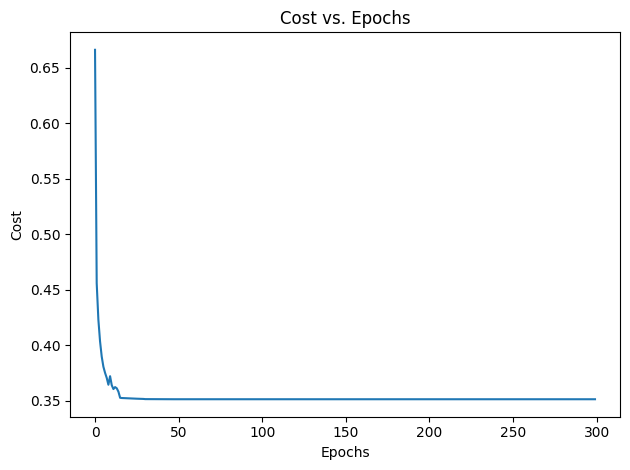

In [73]:
# Plot the cross entropy loss
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.title('Cost vs. Epochs')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()


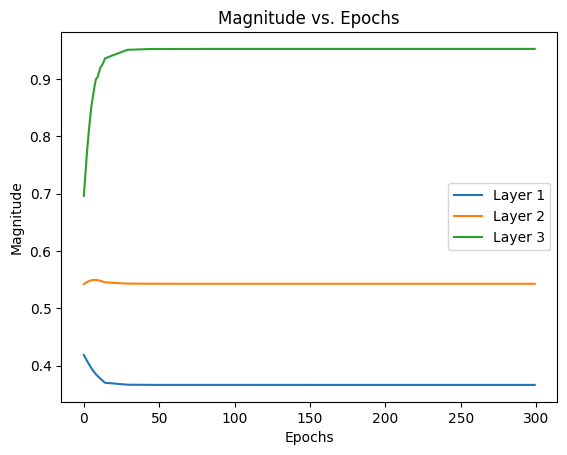

In [71]:
# graph the magnitudes for each layer versus the number of epochs
fig, ax = plt.subplots()
epochs = range(nn.epochs) # use range() to generate a sequence of integers
ax.plot(epochs, nn.mag_1, label='Layer 1')
ax.plot(epochs, nn.mag_2, label='Layer 2')
ax.plot(epochs, nn.mag_3, label='Layer 3')
ax.set_xlabel('Epochs')
ax.set_ylabel('Magnitude')
ax.set_title('Magnitude vs. Epochs')
ax.legend()
plt.show()

In [72]:
# create a 4 layer perceptron class
class FourLayerPerceptron(object):
    def __init__(self, n_hidden1=30, n_hidden2=30, n_hidden3=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.n_hidden3 = n_hidden3
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta

    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
        return onehot
    
    def _initialize_weights(self):
        '''Initialize weidhgts with small random numbers'''
        # Layer 1
        W1_num_elems = (self.n_features_)*self.n_hidden1
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden1, self.n_features_)
        b1 = np.zeros((self.n_hidden1, 1))

        # Layer 2
        W2_num_elems = (self.n_hidden1)*self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden1)
        b2 = np.zeros((self.n_hidden2, 1))

        # Layer 3
        W3_num_elems = (self.n_hidden2)*self.n_hidden3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden3, self.n_hidden2)
        b3 = np.zeros((self.n_hidden3, 1))

        # Layer 4
        W4_num_elems = (self.n_hidden3)*self.n_output_
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_output_, self.n_hidden3)
        b4 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, b1, b2, b3, b4
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        return expit(z)
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2))
    
    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A5)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    
    def _feed_forward(self, X, W1, W2, W3, W4, b1, b2, b3, b4):
        '''Compute feedforward step'''
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5
    
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        '''Compute gradient step using backpropagation'''
        # vectorized backpropagation
        V4 = -2*(Y_enc-A5)*A5*(1-A5)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))
        
        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4
    
    def predict(self, X):
        '''Predict class labels'''
        _, _, _, _, _, _, _, _, A5 = self._feed_forward(X, self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4)
        y_pred = np.argmax(A5, axis=0)
        return y_pred

In [74]:
# Four layer perceptron with mini-batch and cooling and cross entropy loss and Glorot initialization
class FourLayerEnhanced(FourLayerPerceptron):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)

    # Glorot initialization
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden2 + self.n_hidden1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1)) 

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden3 + self.n_hidden2))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden3, self.n_hidden2)) 

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden3))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden3)) 

        # set these to zero to start so that
        # they do not immediately saturate
        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_hidden3, 1))
        b4 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, b1, b2, b3, b4
    
    # Cross entropy loss
    def _cost(self,A5,Y_enc,W1,W2,W3,W4):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A5+1e-7)+(1-Y_enc)*np.log(1-A5+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4)
        return cost + L2_term
    
    # Vectorized backpropagation
    def _get_gradient(self, A1, A2, A3, A4, A5, Z1, Z2, Z3, Z4, Y_enc, W1, W2, W3, W4):
        '''Compute gradient step using backpropagation'''
        # vectorized backpropagation
        V4 = (A5-Y_enc)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.b1, self.b2, self.b3, self.b4 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)

        self.cost_ = []
        self.score_ = []

        # keep track of magnitude for each layer
        self.mag_1 = []
        self.mag_2 = []
        self.mag_3 = []
        self.mag_4 = []

        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
        
        for i in range(self.epochs):
                
                # adaptive learning rate
                # decrease at certain epochs
                eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

                if print_progress>0 and (i+1)%print_progress==0:
                    sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                    sys.stderr.flush()

                if self.shuffle:
                    idx_shuffle = np.random.permutation(y_data.shape[0])
                    X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]
                
                mini = np.array_split(range(y_data.shape[0]), self.minibatches)
                mini_cost = []
                for idx in mini:

                    # feedforward
                    A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5 = self._feed_forward(X_data[idx],
                                                        self.W1,
                                                        self.W2,
                                                        self.W3,
                                                        self.W4,
                                                        self.b1,
                                                        self.b2,
                                                        self.b3,
                                                        self.b4
                                                        )
                    
                    cost = self._cost(A5,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4)
                    mini_cost.append(cost) # this appends cost of mini-batch only

                    # compute gradient via backpropagation
                    gradW1, gradW2, gradW3, gradW4, gradb1, gradb2, gradb3, gradb4 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4,
                                                      Y_enc=Y_enc[:, idx],
                                                      W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4)
                    
                    # simple momentum calculations
                    rho_W1, rho_W2, rho_W3, rho_W4 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4
                    self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                    self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                    self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                    self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                    self.b1 -= eta * gradb1
                    self.b2 -= eta * gradb2
                    self.b3 -= eta * gradb3
                    self.b4 -= eta * gradb4

                    # update previous parameters
                    rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev = rho_W1, rho_W2, rho_W3, rho_W4

                # Calculate magnitude of weights for each layer
                self.mag_1.append(np.mean(np.abs(self.W1)))
                self.mag_2.append(np.mean(np.abs(self.W2)))
                self.mag_3.append(np.mean(np.abs(self.W3)))
                self.mag_4.append(np.mean(np.abs(self.W4)))

                self.cost_.append(np.mean(mini_cost))
                self.score_.append(accuracy_score(y_data,self.predict(X_data)))

                # update if a validation set was provided
                if XY_test is not None:
                    yhat = self.predict(X_test)
                    self.val_score_.append(accuracy_score(y_test,yhat))

        return self

In [76]:
vals = { 'n_hidden1':60, 'n_hidden2':44, 'n_hidden3':33,
            'C':0.1, 'epochs':100, 'eta':0.001,
            'alpha':0.001, 'decrease_const':0.1, 'decrease_iter':15,
            'minibatches':50,
            'shuffle':True,'random_state':1}

nn = FourLayerEnhanced(**vals)
%time nn.fit(X_train_smote_norm_enc, y_train_smote, print_progress=10, XY_test=(X_test_norm_enc, y_test))
print_accuracies(nn,X_train_smote_norm_enc,y_train_smote,X_test_norm_enc,y_test)

Epoch: 100/100

CPU times: user 9min 6s, sys: 1min 51s, total: 10min 58s
Wall time: 1min 12s
Resubstitution accuracy: 0.7395813305133628
Validation accuracy: 0.7082645764576457


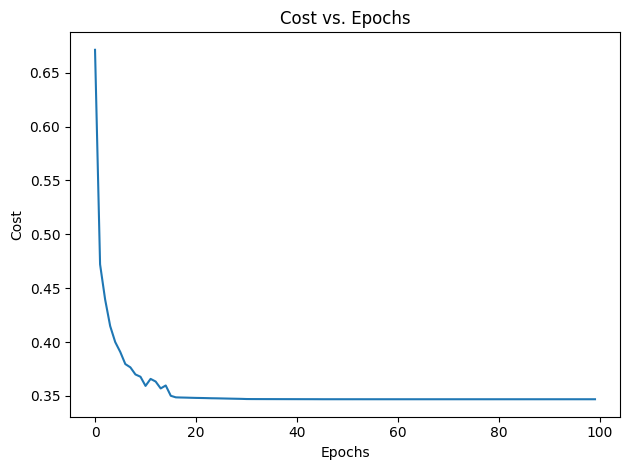

In [77]:
# plot the cross entropy loss
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.title('Cost vs. Epochs')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

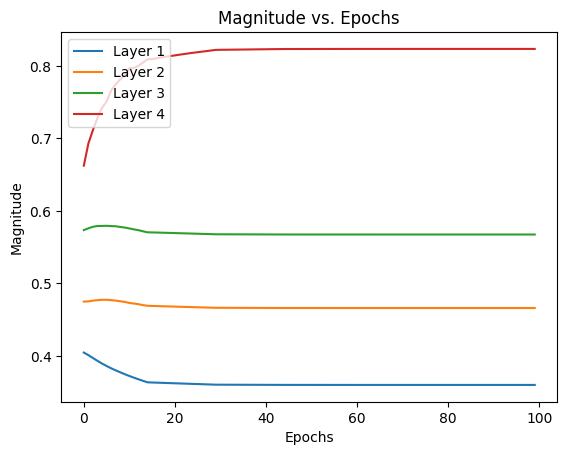

In [78]:
# graph the magnitudes for each layer versus the number of epochs
fig, ax = plt.subplots()
epochs = range(nn.epochs) # use range() to generate a sequence of integers
ax.plot(epochs, nn.mag_1, label='Layer 1')
ax.plot(epochs, nn.mag_2, label='Layer 2')
ax.plot(epochs, nn.mag_3, label='Layer 3')
ax.plot(epochs, nn.mag_4, label='Layer 4')
ax.set_xlabel('Epochs')
ax.set_ylabel('Magnitude')
ax.set_title('Magnitude vs. Epochs')
ax.legend()
plt.show()

In [79]:
# 5 layer perceptron class
class FiveLayerPerceptron(object):
    def __init__(self, n_hidden1=30, n_hidden2=30, n_hidden3=30, n_hidden4=30,
                 C=0.0, epochs=500, eta=0.001, random_state=None):
        np.random.seed(random_state)
        self.n_hidden1 = n_hidden1
        self.n_hidden2 = n_hidden2
        self.n_hidden3 = n_hidden3
        self.n_hidden4 = n_hidden4
        self.l2_C = C
        self.epochs = epochs
        self.eta = eta
    
    @staticmethod
    def _encode_labels(y):
        """Encode labels into one-hot representation"""
        onehot = pd.get_dummies(y).values.T
        return onehot
    
    def _initialize_weights(self):
        '''Initialize weidhgts with small random numbers'''
        # Layer 1
        W1_num_elems = (self.n_features_)*self.n_hidden1
        W1 = np.random.uniform(-1.0, 1.0, size=W1_num_elems)
        W1 = W1.reshape(self.n_hidden1, self.n_features_)
        b1 = np.zeros((self.n_hidden1, 1))

        # Layer 2
        W2_num_elems = (self.n_hidden1)*self.n_hidden2
        W2 = np.random.uniform(-1.0, 1.0, size=W2_num_elems)
        W2 = W2.reshape(self.n_hidden2, self.n_hidden1)
        b2 = np.zeros((self.n_hidden2, 1))

        # Layer 3
        W3_num_elems = (self.n_hidden2)*self.n_hidden3
        W3 = np.random.uniform(-1.0, 1.0, size=W3_num_elems)
        W3 = W3.reshape(self.n_hidden3, self.n_hidden2)
        b3 = np.zeros((self.n_hidden3, 1))

        # Layer 4
        W4_num_elems = (self.n_hidden3)*self.n_hidden4
        W4 = np.random.uniform(-1.0, 1.0, size=W4_num_elems)
        W4 = W4.reshape(self.n_hidden4, self.n_hidden3)
        b4 = np.zeros((self.n_hidden4, 1))

        # Layer 5
        W5_num_elems = (self.n_hidden4)*self.n_output_
        W5 = np.random.uniform(-1.0, 1.0, size=W5_num_elems)
        W5 = W5.reshape(self.n_output_, self.n_hidden4)
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5
    
    @staticmethod
    def _sigmoid(z):
        """Use scipy.special.expit to avoid overflow"""
        return expit(z)
    
    @staticmethod
    def _L2_reg(lambda_, W1, W2, W3, W4, W5):
        """Compute L2-regularization cost"""
        # only compute for non-bias terms
        return (lambda_/2.0) * np.sqrt(np.mean(W1[:, 1:] ** 2) + np.mean(W2[:, 1:] ** 2) + np.mean(W3[:, 1:] ** 2) + np.mean(W4[:, 1:] ** 2) + np.mean(W5[:, 1:] ** 2))
    
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = np.mean((Y_enc-A6)**2)
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    def _feed_forward(self, X, W1, W2, W3, W4, W5, b1, b2, b3, b4, b5):
        '''Compute feedforward step'''
        A1 = X.T
        Z1 = W1 @ A1 + b1
        A2 = self._sigmoid(Z1)
        Z2 = W2 @ A2 + b2
        A3 = self._sigmoid(Z2)
        Z3 = W3 @ A3 + b3
        A4 = self._sigmoid(Z3)
        Z4 = W4 @ A4 + b4
        A5 = self._sigmoid(Z4)
        Z5 = W5 @ A5 + b5
        A6 = self._sigmoid(Z5)
        return A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6
    
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        '''Compute gradient step using backpropagation'''
        # vectorized backpropagation
        V5 = -2*(Y_enc-A6)*A6*(1-A6)
        V4 = A5*(1-A5)*(W5.T @ V5)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)
        
        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T
        
        gradb5 = np.sum(V5, axis=1).reshape((-1,1))
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5
    
    def predict(self, X):
        '''Predict class labels'''
        _, _, _, _, _, _, _, _, _, _, A6 = self._feed_forward(X, self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5)
        y_pred = np.argmax(A6, axis=0)
        return y_pred


In [80]:
# Five layer perceptron with mini-batch and cooling and cross entropy loss and Glorot initialization
class FiveLayerEnhanced(FiveLayerPerceptron):
    def __init__(self, alpha=0.0, decrease_const=0.1, 
                 decrease_iter = 10, shuffle=True, 
                 minibatches=1, **kwds):        
        # need to add to the original initializer 
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.decrease_iter = decrease_iter
        self.shuffle = shuffle
        self.minibatches = minibatches
        # but keep other keywords
        super().__init__(**kwds)
    
    # Glorot initialization
    def _initialize_weights(self):
        """Initialize weights Glorot and He normalization."""
        init_bound = 4*np.sqrt(6. / (self.n_hidden1 + self.n_features_))
        W1 = np.random.uniform(-init_bound, init_bound,(self.n_hidden1, self.n_features_))

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden2 + self.n_hidden1))
        W2 = np.random.uniform(-init_bound, init_bound,(self.n_hidden2, self.n_hidden1)) 

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden3 + self.n_hidden2))
        W3 = np.random.uniform(-init_bound, init_bound,(self.n_hidden3, self.n_hidden2)) 

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_hidden4 + self.n_hidden3))
        W4 = np.random.uniform(-init_bound, init_bound,(self.n_hidden4, self.n_hidden3)) 

        # reduce the final layer magnitude in order to balance the size of the gradients
        # between 
        init_bound = 4*np.sqrt(6 / (self.n_output_ + self.n_hidden4))
        W5 = np.random.uniform(-init_bound, init_bound,(self.n_output_, self.n_hidden4)) 

        # set these to zero to start so that
        # they do not immediately saturate
        b1 = np.zeros((self.n_hidden1, 1))
        b2 = np.zeros((self.n_hidden2, 1))
        b3 = np.zeros((self.n_hidden3, 1))
        b4 = np.zeros((self.n_hidden4, 1))
        b5 = np.zeros((self.n_output_, 1))

        return W1, W2, W3, W4, W5, b1, b2, b3, b4, b5
    
    # Cross entropy loss
    def _cost(self,A6,Y_enc,W1,W2,W3,W4,W5):
        '''Get the objective function value'''
        cost = -np.mean(np.nan_to_num((Y_enc*np.log(A6+1e-7)+(1-Y_enc)*np.log(1-A6+1e-7))))
        L2_term = self._L2_reg(self.l2_C, W1, W2, W3, W4, W5)
        return cost + L2_term
    
    # Vectorized backpropagation
    def _get_gradient(self, A1, A2, A3, A4, A5, A6, Z1, Z2, Z3, Z4, Z5, Y_enc, W1, W2, W3, W4, W5):
        '''Compute gradient step using backpropagation'''
        # vectorized backpropagation
        V5 = (A6-Y_enc)
        V4 = A5*(1-A5)*(W5.T @ V5)
        V3 = A4*(1-A4)*(W4.T @ V4)
        V2 = A3*(1-A3)*(W3.T @ V3)
        V1 = A2*(1-A2)*(W2.T @ V2)

        gradW5 = V5 @ A5.T
        gradW4 = V4 @ A4.T
        gradW3 = V3 @ A3.T
        gradW2 = V2 @ A2.T
        gradW1 = V1 @ A1.T

        gradb5 = np.sum(V5, axis=1).reshape((-1,1))
        gradb4 = np.sum(V4, axis=1).reshape((-1,1))
        gradb3 = np.sum(V3, axis=1).reshape((-1,1))
        gradb2 = np.sum(V2, axis=1).reshape((-1,1))
        gradb1 = np.sum(V1, axis=1).reshape((-1,1))

        # regularize weights that are not bias terms
        gradW1 += W1 * self.l2_C
        gradW2 += W2 * self.l2_C
        gradW3 += W3 * self.l2_C
        gradW4 += W4 * self.l2_C
        gradW5 += W5 * self.l2_C

        return gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5
    
    def fit(self, X, y, print_progress=False, XY_test=None):
        """ Learn weights from training data. With mini-batch"""
        X_data, y_data = X.copy(), y.copy()
        Y_enc = self._encode_labels(y)
        
        # init weights and setup matrices
        self.n_features_ = X_data.shape[1]
        self.n_output_ = Y_enc.shape[0]
        self.W1, self.W2, self.W3, self.W4, self.W5, self.b1, self.b2, self.b3, self.b4, self.b5 = self._initialize_weights()

        # start momentum at zero for previous updates
        rho_W1_prev = np.zeros(self.W1.shape)
        rho_W2_prev = np.zeros(self.W2.shape)
        rho_W3_prev = np.zeros(self.W3.shape)
        rho_W4_prev = np.zeros(self.W4.shape)
        rho_W5_prev = np.zeros(self.W5.shape)

        self.cost_ = []
        self.score_ = []

        # keep track of magnitude for each layer
        self.mag_1 = []
        self.mag_2 = []
        self.mag_3 = []
        self.mag_4 = []
        self.mag_5 = []

        # get starting acc
        self.score_.append(accuracy_score(y_data,self.predict(X_data)))
        # keep track of validation, if given
        if XY_test is not None:
            X_test = XY_test[0].copy()
            y_test = XY_test[1].copy()
            self.val_score_ = []
            self.val_score_.append(accuracy_score(y_test,self.predict(X_test)))
            self.val_cost_ = []
        
        for i in range(self.epochs):
                
                # adaptive learning rate
                # decrease at certain epochs
                eta = self.eta * self.decrease_const**(np.floor(i/self.decrease_iter))

                if print_progress>0 and (i+1)%print_progress==0:
                    sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                    sys.stderr.flush()

                if self.shuffle:
                    idx_shuffle = np.random.permutation(y_data.shape[0])
                    X_data, Y_enc, y_data = X_data[idx_shuffle], Y_enc[:, idx_shuffle], y_data[idx_shuffle]

                mini = np.array_split(range(y_data.shape[0]), self.minibatches)
                mini_cost = []
                for idx in mini:

                    # feedforward
                    A1, Z1, A2, Z2, A3, Z3, A4, Z4, A5, Z5, A6 = self._feed_forward(X_data[idx],
                                                        self.W1,
                                                        self.W2,
                                                        self.W3,
                                                        self.W4,
                                                        self.W5,
                                                        self.b1,
                                                        self.b2,
                                                        self.b3,
                                                        self.b4,
                                                        self.b5
                                                        )
                    
                    cost = self._cost(A6,Y_enc[:, idx],self.W1,self.W2,self.W3,self.W4,self.W5)
                    mini_cost.append(cost)

                    # compute gradient via backpropagation
                    gradW1, gradW2, gradW3, gradW4, gradW5, gradb1, gradb2, gradb3, gradb4, gradb5 = self._get_gradient(A1=A1, A2=A2, A3=A3, A4=A4, A5=A5, A6=A6, Z1=Z1, Z2=Z2, Z3=Z3, Z4=Z4, Z5=Z5,
                                                      Y_enc=Y_enc[:, idx],
                                                      W1=self.W1,W2=self.W2,W3=self.W3,W4=self.W4,W5=self.W5)
                    
                    # simple momentum calculations
                    rho_W1, rho_W2, rho_W3, rho_W4, rho_W5 = eta * gradW1, eta * gradW2, eta * gradW3, eta * gradW4, eta * gradW5
                    self.W1 -= (rho_W1 + (self.alpha * rho_W1_prev))
                    self.W2 -= (rho_W2 + (self.alpha * rho_W2_prev))
                    self.W3 -= (rho_W3 + (self.alpha * rho_W3_prev))
                    self.W4 -= (rho_W4 + (self.alpha * rho_W4_prev))
                    self.W5 -= (rho_W5 + (self.alpha * rho_W5_prev))
                    self.b1 -= eta * gradb1
                    self.b2 -= eta * gradb2
                    self.b3 -= eta * gradb3
                    self.b4 -= eta * gradb4

                    # update previous parameters
                    rho_W1_prev, rho_W2_prev, rho_W3_prev, rho_W4_prev, rho_W5_prev = rho_W1, rho_W2, rho_W3, rho_W4, rho_W5

                # Calculate magnitude of weights for each layer
                self.mag_1.append(np.mean(np.abs(self.W1)))
                self.mag_2.append(np.mean(np.abs(self.W2)))
                self.mag_3.append(np.mean(np.abs(self.W3)))
                self.mag_4.append(np.mean(np.abs(self.W4)))
                self.mag_5.append(np.mean(np.abs(self.W5)))

                self.cost_.append(np.mean(mini_cost))
                self.score_.append(accuracy_score(y_data,self.predict(X_data)))

                # update if a validation set was provided
                if XY_test is not None:
                    yhat = self.predict(X_test)
                    self.val_score_.append(accuracy_score(y_test,yhat))

        return self

In [81]:
vals = { 'n_hidden1':60, 'n_hidden2':44, 'n_hidden3':33, 'n_hidden4':26,
            'C':0.1, 'epochs':100, 'eta':0.001,
            'alpha':0.001, 'decrease_const':0.1, 'decrease_iter':15,
            'minibatches':50,
            'shuffle':True,'random_state':1}

fiveLayer_nn = FiveLayerEnhanced(**vals)
%time fiveLayer_nn.fit(X_train_smote_norm_enc, y_train_smote, print_progress=10, XY_test=(X_test_norm_enc, y_test))
print_accuracies(fiveLayer_nn,X_train_smote_norm_enc,y_train_smote,X_test_norm_enc,y_test)

Epoch: 100/100

CPU times: user 9min 19s, sys: 2min 2s, total: 11min 22s
Wall time: 1min 13s
Resubstitution accuracy: 0.7368775235531628
Validation accuracy: 0.70248899889989


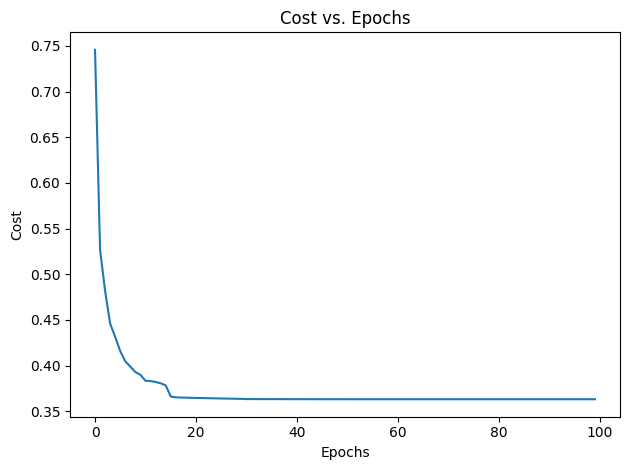

In [82]:
# plot the cross entropy loss
plt.plot(range(len(fiveLayer_nn.cost_)), fiveLayer_nn.cost_)
plt.title('Cost vs. Epochs')
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

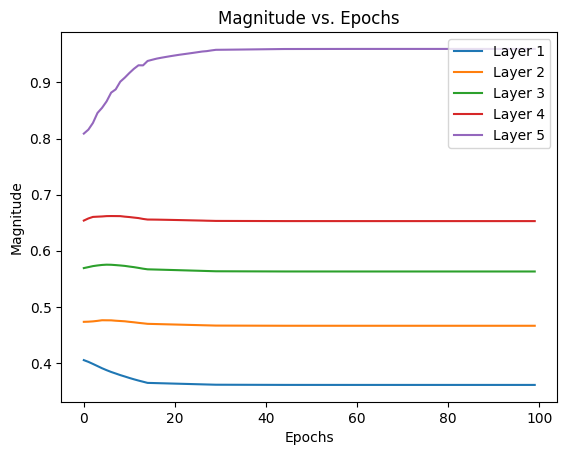

In [83]:
# graph the magnitudes for each layer versus the number of epochs
fig, ax = plt.subplots()
epochs = range(fiveLayer_nn.epochs) # use range() to generate a sequence of integers
ax.plot(epochs, fiveLayer_nn.mag_1, label='Layer 1')
ax.plot(epochs, fiveLayer_nn.mag_2, label='Layer 2')
ax.plot(epochs, fiveLayer_nn.mag_3, label='Layer 3')
ax.plot(epochs, fiveLayer_nn.mag_4, label='Layer 4')
ax.plot(epochs, fiveLayer_nn.mag_5, label='Layer 5')
ax.set_xlabel('Epochs')
ax.set_ylabel('Magnitude')
ax.set_title('Magnitude vs. Epochs')
ax.legend()
plt.show()